# Import Libraries

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

In [246]:
# load data
df_area = pd.read_csv("Desktop/IBM Data Science/Capstone Project/ALLrows_HPD_2G.csv")
df_area.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-08-19T02:16:39.000,43584064,PLUMBING,10033.0,612 WEST 178 STREET,WEST 178 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.847546,-73.935648,NaN,RESIDENTIAL BUILDING,Open
1,2019-08-19T15:54:15.000,43587056,PLUMBING,11225.0,170 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.657556,-73.954746,NaN,RESIDENTIAL BUILDING,Open
2,2019-08-19T20:15:05.000,43583514,PLUMBING,11221.0,600 GATES AVENUE,GATES AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.687320,-73.940934,NaN,RESIDENTIAL BUILDING,Open
3,2019-08-19T16:27:54.000,43591000,SAFETY,11373.0,94-54 42 AVENUE,42 AVENUE,ADDRESS,Elmhurst,The following complaint conditions are still o...,QUEENS,40.745854,-73.869786,NaN,RESIDENTIAL BUILDING,Open
4,2019-08-19T15:46:46.000,43588078,APPLIANCE,10032.0,251 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.843594,-73.941522,NaN,RESIDENTIAL BUILDING,Open


In [247]:
#Select columns
df_area_select = df_area[["complaint_type","incident_zip", "street_name","borough","incident_address"]]
df_area_select.head()

,complaint_type,incident_zip,street_name,borough,incident_address
0,PLUMBING,10033.0,WEST 178 STREET,MANHATTAN,612 WEST 178 STREET
1,PLUMBING,11225.0,HAWTHORNE STREET,BROOKLYN,170 HAWTHORNE STREET
2,PLUMBING,11221.0,GATES AVENUE,BROOKLYN,600 GATES AVENUE
3,SAFETY,11373.0,42 AVENUE,QUEENS,94-54 42 AVENUE
4,APPLIANCE,10032.0,FT WASHINGTON AVENUE,MANHATTAN,251 FT WASHINGTON AVENUE


In [248]:
#Select Complaint Type
df_area_select_CT = df_area_select[(df_area_select["complaint_type"] == "HEAT/HOT WATER")| 
                                   (df_area_select["complaint_type"]== "HEATING")|
                                  (df_area_select["complaint_type"]== "PLUMBING")|
                                  (df_area_select["complaint_type"]== "GENERAL CONSTRUCTION")|
                                  (df_area_select["complaint_type"]== "UNSANITARY CONDITION")]
df_area_select_CT.head()

,complaint_type,incident_zip,street_name,borough,incident_address
0,PLUMBING,10033.0,WEST 178 STREET,MANHATTAN,612 WEST 178 STREET
1,PLUMBING,11225.0,HAWTHORNE STREET,BROOKLYN,170 HAWTHORNE STREET
2,PLUMBING,11221.0,GATES AVENUE,BROOKLYN,600 GATES AVENUE
5,UNSANITARY CONDITION,11226.0,PARKSIDE AVENUE,BROOKLYN,225 PARKSIDE AVENUE
12,HEAT/HOT WATER,10025.0,BROADWAY,MANHATTAN,2481 BROADWAY


# Focus On

## particular boroughs

In [249]:
df_borough = df_area_select_CT[["complaint_type", "borough"]]

In [250]:
df_borough_group = df_borough[df_area_select["complaint_type"] == "HEAT/HOT WATER"].groupby(by = "borough", as_index=False).count()
df_borough_group

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,borough,complaint_type
0,BRONX,373859
1,BROOKLYN,351816
2,MANHATTAN,260335
3,QUEENS,152349
4,STATEN ISLAND,11368
5,Unspecified,1


Text(0.5, 1.0, 'HEAT/HOT WATER and Borough')

<Figure size 1152x720 with 0 Axes>

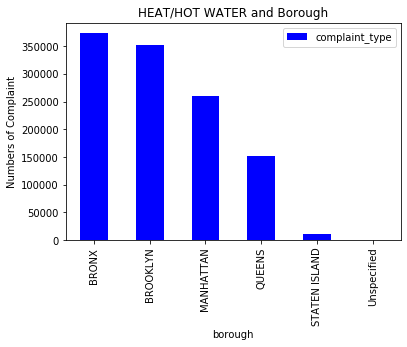

In [251]:
plt.figure(figsize=(16,10))
df_borough_group.plot(x = "borough", kind="bar", color = "b")
plt.ylabel("Numbers of Complaint")
plt.title("HEAT/HOT WATER and Borough")

Conclusion: As the analysis and picture shows, when considering about  HEAT/HOT WATER  complaints, the number of BRONX borough is highest. So in this way, HPD should focus on BRONX borough.

#### Provide other insights that related to the problem

In [252]:
# In this way, we focus on HEATING
df_borough_group_1 = df_borough[df_borough["complaint_type"] == "HEATING"].groupby(by = ["borough"], as_index=False).count()
df_borough_group_1

,borough,complaint_type
0,BRONX,195284
1,BROOKLYN,190325
2,MANHATTAN,137525
3,QUEENS,75804
4,STATEN ISLAND,6015
5,Unspecified,282916


Text(0.5, 1.0, 'HEATING and Borough')

<Figure size 1152x720 with 0 Axes>

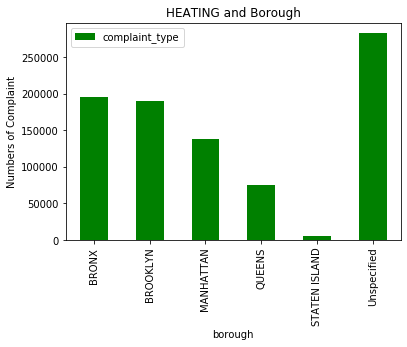

In [253]:
plt.figure(figsize=(16,10))
df_borough_group_1.plot(x = "borough", kind="bar", color = "g")
plt.ylabel("Numbers of Complaint")
plt.title("HEATING and Borough")

Conclusion: As we can see, both BRONX and BROOKLYN have the most HEATING complaints. And if HPD plans to focus on HEATING complaints, focusing on both BRONX and BROOKLYN is a better choice.

## particular ZIP

In [254]:
df_zip = df_area_select_CT[["complaint_type", "incident_zip"]]
df_zip.head()

,complaint_type,incident_zip
0,PLUMBING,10033.0
1,PLUMBING,11225.0
2,PLUMBING,11221.0
5,UNSANITARY CONDITION,11226.0
12,HEAT/HOT WATER,10025.0


In [255]:
#The top 5
df_zip_group = df_zip[df_zip["complaint_type"] == "HEAT/HOT WATER"].groupby(by = "incident_zip", as_index=False).count()
df_zip_group = df_zip_group.sort_values(by="complaint_type", ascending= False)
df_zip_group.head()

,incident_zip,complaint_type
124,11226.0,38110
71,10458.0,35670
80,10467.0,34712
81,10468.0,31262
66,10453.0,31240


Text(0.5, 1.0, 'HEAT/HOT WATER and ZIP')

<Figure size 1152x720 with 0 Axes>

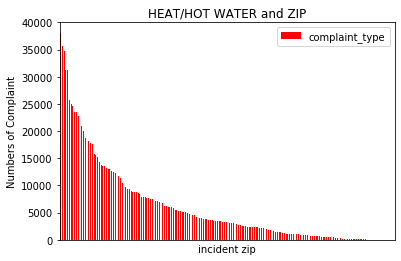

In [256]:
plt.figure(figsize=(16,10))
df_zip_group[["complaint_type"]].plot(kind="bar", color = "r")
plt.xticks(())
plt.xlabel("incident zip")
plt.ylabel("Numbers of Complaint")
plt.title("HEAT/HOT WATER and ZIP")

Conclusion: As the analysis and picture shows, when considering about HEAT/HOT WATER complaints, the number of ZIP11226, ZIP10458, ZIP10467, ZIP10468, ZIP10453 are the top 5 highest. So in this way, HPD should focus on these five ZIPs.

#### Provide other insights that related to the problem

In [257]:
# In this way, we focus on PLUMBING
df_zip_group_1 = df_zip[df_zip["complaint_type"] == "PLUMBING"].groupby(by = ["incident_zip"], as_index=False).count()
df_zip_group_1 = df_zip_group_1.sort_values(by = "complaint_type", ascending = False)
df_zip_group_1.head()

,incident_zip,complaint_type
119,11226.0,28212
62,10453.0,19441
76,10467.0,19387
66,10457.0,19028
67,10458.0,19001


Text(0.5, 1.0, 'PLUMBING and ZIP')

<Figure size 1152x720 with 0 Axes>

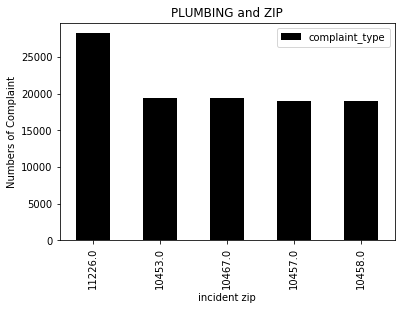

In [258]:
plt.figure(figsize=(16,10))
df_zip_group_1.iloc[0:5,:].plot(x="incident_zip", kind="bar",color = "black")
plt.xlabel("incident zip")
plt.ylabel("Numbers of Complaint")
plt.title("PLUMBING and ZIP")

Conclusion: When we focus on this specific type "PLUMBING", we can find the complaints number of ZIP11226 is much higher than other ZIPs. So, HPD should focus on this area first.

## particular Street

In [259]:
df_street = df_area_select_CT[["complaint_type", "street_name"]]
df_street.head()

,complaint_type,street_name
0,PLUMBING,WEST 178 STREET
1,PLUMBING,HAWTHORNE STREET
2,PLUMBING,GATES AVENUE
5,UNSANITARY CONDITION,PARKSIDE AVENUE
12,HEAT/HOT WATER,BROADWAY


In [260]:
df_street_group = df_street[df_street["complaint_type"] == "HEAT/HOT WATER"].groupby(by = "street_name", as_index=False).count()
df_street_group = df_street_group.sort_values(by="complaint_type", ascending= False)
df_street_group.head(1)

,street_name,complaint_type
2717,GRAND CONCOURSE,20344


Text(0.5, 1.0, 'HEAT/HOT WATER and 10 top Streets')

<Figure size 1152x720 with 0 Axes>

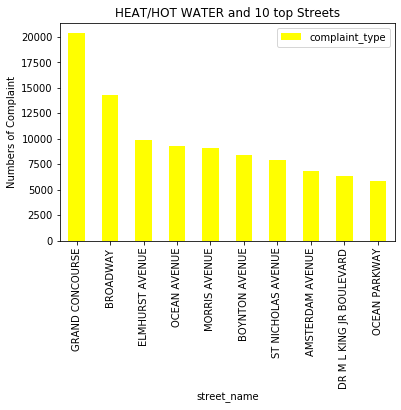

In [261]:
plt.figure(figsize=(16,10))
df_street_group.iloc[0:10,:].plot(x="street_name", kind="bar",color = "yellow")
plt.xlabel("street_name")
plt.ylabel("Numbers of Complaint")
plt.title("HEAT/HOT WATER and 10 top Streets")

Conclusion: As the analysis and picture shows, when considering about the HEAT/HOT WATER complaints, the number of GRAND CONCOURSE	 street is much higher than other streets. So, there must be something wrong about this street. It is a better choice for HPD focusing on this street.

#### Provide other insights that related to the problem

In [262]:
# In this way, we focus on GENERAL CONSTRUCTION
df_street_group_1 = df_street[df_street["complaint_type"] == "GENERAL CONSTRUCTION"].groupby(by = ["street_name"], as_index=False).count()
df_street_group_1 = df_street_group_1.sort_values(by = "complaint_type", ascending = False)
df_street_group_1.head(10)

,street_name,complaint_type
2123,GRAND CONCOURSE,7893
1110,BROADWAY,5206
2908,OCEAN AVENUE,5144
3405,ST NICHOLAS AVENUE,3514
2779,MORRIS AVENUE,3265
684,AMSTERDAM AVENUE,3218
1830,EASTERN PARKWAY,2838
3682,WALTON AVENUE,2811
1388,CRESTON AVENUE,2727
3172,RIVERSIDE DRIVE,2567


Text(0.5, 1.0, 'GENERAL CONSTRUCTION and Street')

<Figure size 1152x720 with 0 Axes>

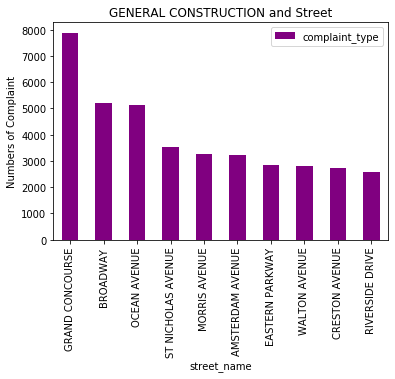

In [263]:
plt.figure(figsize=(16,10))
df_street_group_1.iloc[0:10,:].plot(x="street_name", kind="bar",color = "purple")
plt.xlabel("street_name")
plt.ylabel("Numbers of Complaint")
plt.title("GENERAL CONSTRUCTION and Street")

Conclusion: It is not surprising that GRAND CONCOURSE also has the most complaints when considering type "GENERAL CONSTRUCTION". So no matter which kind of complaints HPD wants to focus first, they must address with GRAND CONCOURSE first.

# Final Concluding

# ATTENTION : The agency should focus on BRONX borough, 11226 zip code, GRAND CONCOURSE street!!!